# Stupidly simple library to track experiments in an excel
VevestaX is an open source library. It can be used to track experiments in an excel file and does EDA automatically. The excel file is generated in /kaggle/working/vevesta.xlsx folder. For detailed tutorial on how to use vevestaX read Github link of the library at https://github.com/Vevesta/VevestaX. We are Github for Data Science projects, explore us for free. For more details about us visit: https://www.vevesta.com?utm_source=Kaggle 

The output file vevesta.xlsx is attached in the data section of the notebook.
Give is a github star, if you liked the library at https://github.com/Vevesta/VevestaX

**Feel free to comment if you have any suggestions or questions!**

## Table of contents
1. [Install vevestaX](#1)
2. [Importing VevestaX and creating its object](#2)
3. [Loading Dataset](#3)
4. [Using VevestaX to extracting features used](#4)
5. [Preprocessing Data](#5)
6. [Spliting Data into Train and Test](#6)
7. [Modelling - Tracking variables with VevestaX](#7)
8. [Using VevestaX to dump the variables and features into an excel file](#8)
9. [Experimenting with another Model - Tracking new variables with VevestaX](#9)
10. [Using VevestaX to write the experiment(features and the variables) into the excel file](#10)
11. [Screenshots of output excel file generated by VevestaX](#11)
12. [References](#12)


<a id="1"></a>
## Install vevestaX
Remember to toggle the internet button to on.

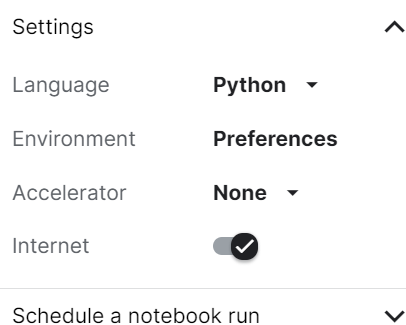

We are using latest version of VevestaX 2.9.0.

In [ ]:
!pip install vevestaX

<a id="2"></a>
## Importing VevestaX and creating its object

In [ ]:
from vevestaX import vevesta as v
V = v.Experiment()

In [ ]:
# importing libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')


<a id="3"></a>
## Loading Dataset

In [ ]:
file_path="../input/house-prices-advanced-regression-techniques/train.csv"
Data=pd.read_csv(file_path)
pd.set_option('display.max_columns',None)
train_df=Data.copy()

<a id="4"></a>
## Using VevestaX to extracting features used 
The features sourced from the data are extracted from pandas dataframe.

In [ ]:
V.ds = train_df 
#alternatively, V.dataSourcing = df

<a id="5"></a>
## Preprocessing Data

In [ ]:
## cleaning these data

mfeatures=train_df.isnull().mean()[train_df.isnull().mean() > 0.50].index
train_df.drop(mfeatures,axis=1,inplace=True)

train_df.drop(['TotRmsAbvGrd', 'GarageArea', 'GarageYrBlt', '1stFlrSF'],axis=1,inplace=True)

In [ ]:
## handling missing data
cols_missing=[col for col in train_df.columns if train_df[col].isnull().any()]

object_missing=[col for col in cols_missing if train_df[col].dtype=='O']
numerical_missing=list(set(cols_missing)-set(object_missing))

## for categorical features
for col in object_missing:
    train_df[col].fillna(train_df[col].mode()[0],inplace=True)
    
### for numerical features
for col in numerical_missing:
    train_df[col].fillna(train_df[col].mean(),inplace=True)
    
## encoding categorical features
## drop first be true to avoid dummy variable trap
train_df=pd.get_dummies(train_df,drop_first=True)

<a id="6"></a>
## Spliting Data into Train and Test

In [ ]:

X=train_df.drop(['Id','SalePrice'],axis=1)
y=train_df['SalePrice'].values

seed = 10
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=seed)

<a id="7"></a>
## Modelling - Tracking variables with VevestaX

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

learningRate= 0.15
maxDepth = 3
nEstimators = 700
crossValidation = 2

gbt=GradientBoostingRegressor(learning_rate= learningRate,max_depth= maxDepth,n_estimators= nEstimators)
scoreVal=cross_val_score(gbt,X,y,cv=crossValidation)
meanScore = scoreVal.mean()

print(scoreVal)
print(meanScore)

<a id="8"></a>
## Using VevestaX to dump the variables and features into an excel file

In [ ]:
V.dump(techniqueUsed = "Gradient Boosting Regressor")

<a id="9"></a>
## Experimenting with another Model - Tracking new variables with VevestaX

In [ ]:
## random forest
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
trainScore = rf.score(X_train,y_train)
print("training set score:{:.2f}".format(trainScore),'\n')
print('-'*30,'\n')
meanScore = rf.score(X_test,y_test)
print("test set score:{:.2f}".format(meanScore))

<a id="10"></a>
## Using VevestaX to write the experiment(features and the variables) into the excel file

In [ ]:
V.dump(techniqueUsed = "Random Forest",message="default parameters of random forest were used")

<a id="11"></a>
## Screenshots of output excel file generated by VevestaX

Some snapshots of the output excel file generated after multiple experiments. For detailed walk through of the output, see this [google excel sheet](https://docs.google.com/spreadsheets/d/1P6-jYJoTd2KB_7PKVX4gqm-73umYWukm/edit?usp=sharing&ouid=103382336064969333270&rtpof=true&sd=true)



### Data Sources used for the experiments

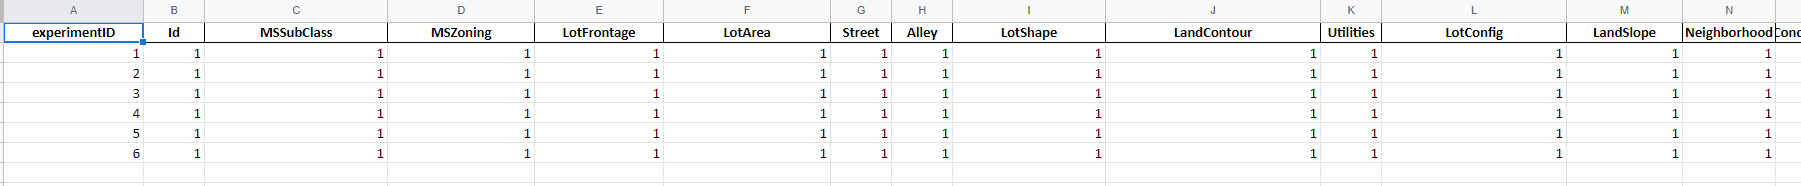

### Features Engineered
Since no features were engineered this tab will be empty

### Tracked Variables  

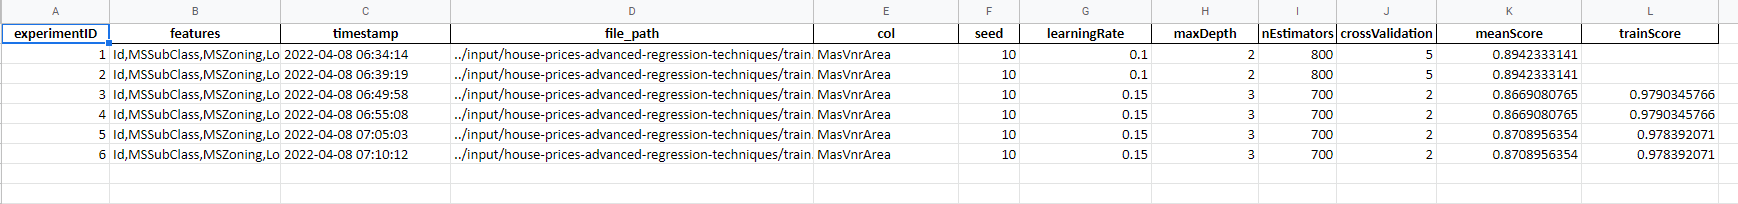

### Perfomance plots - plots of variables tracked in multiple experiments

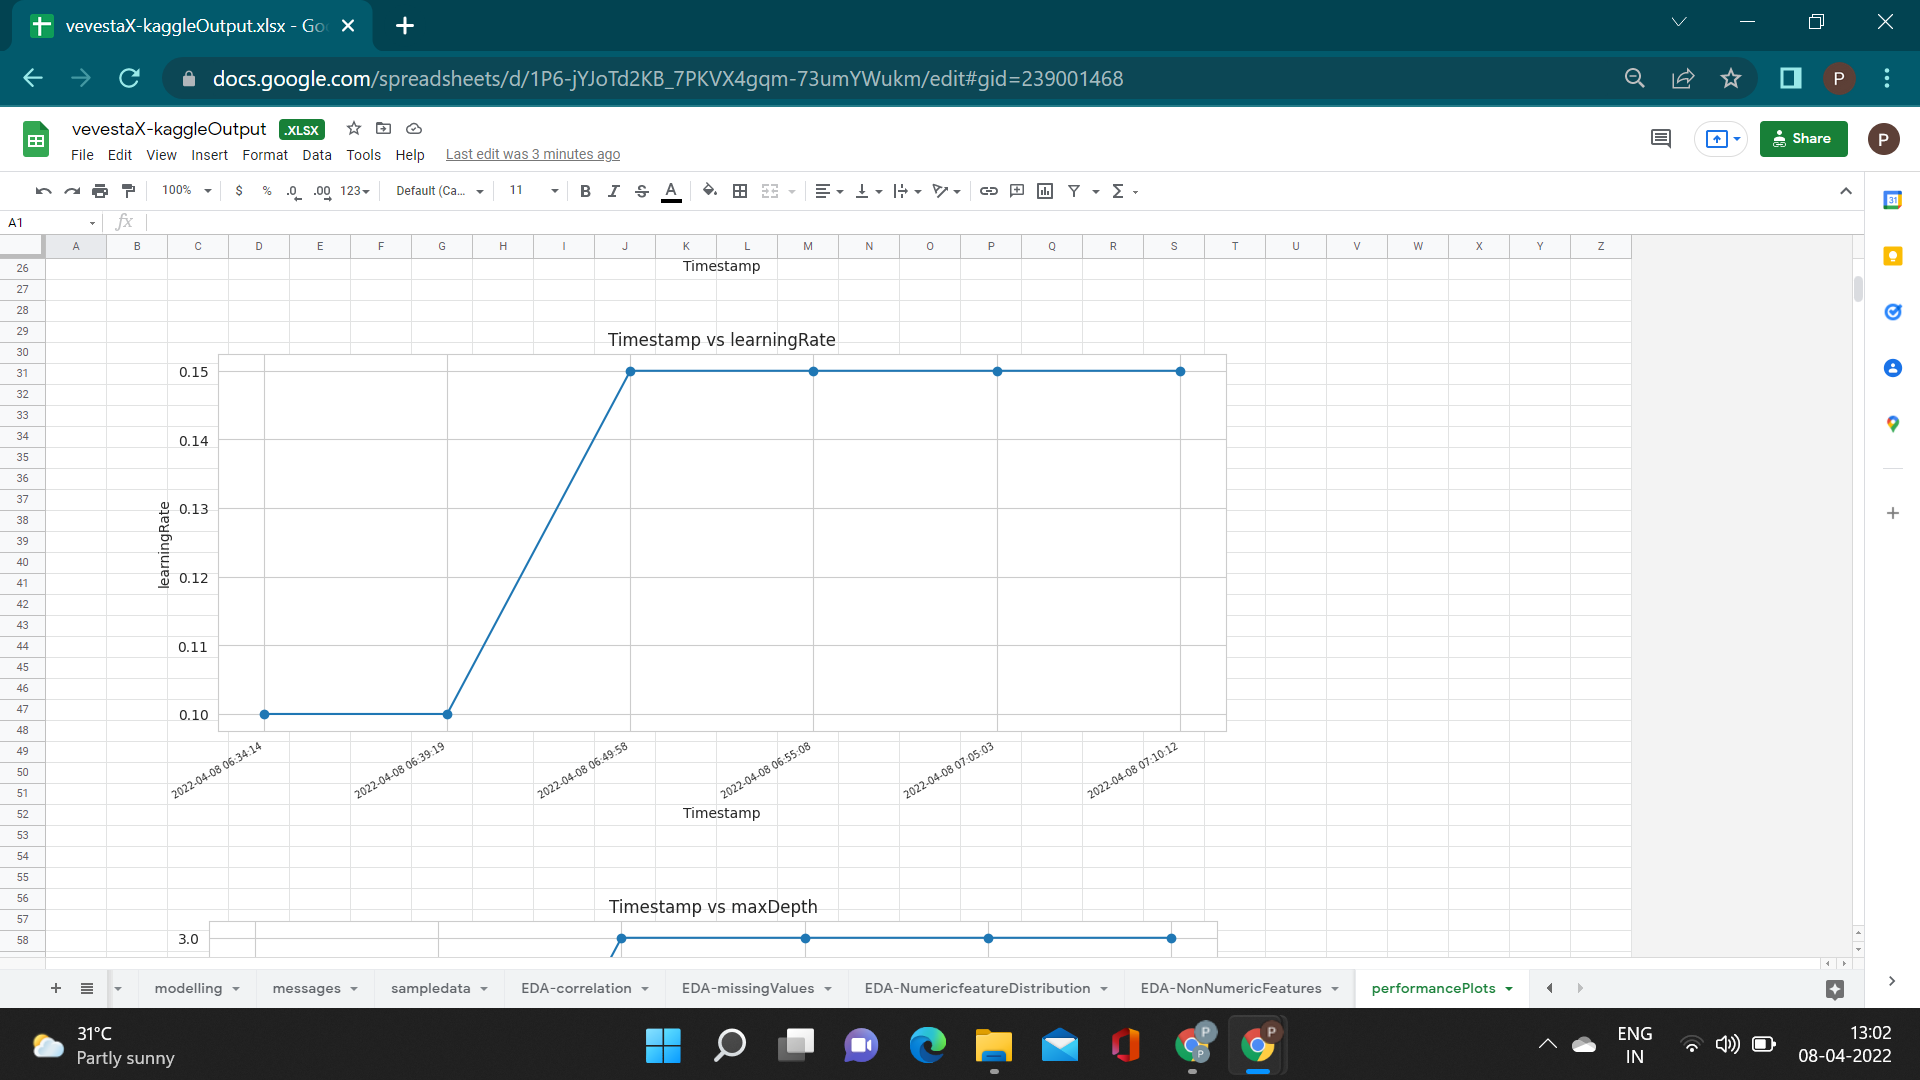

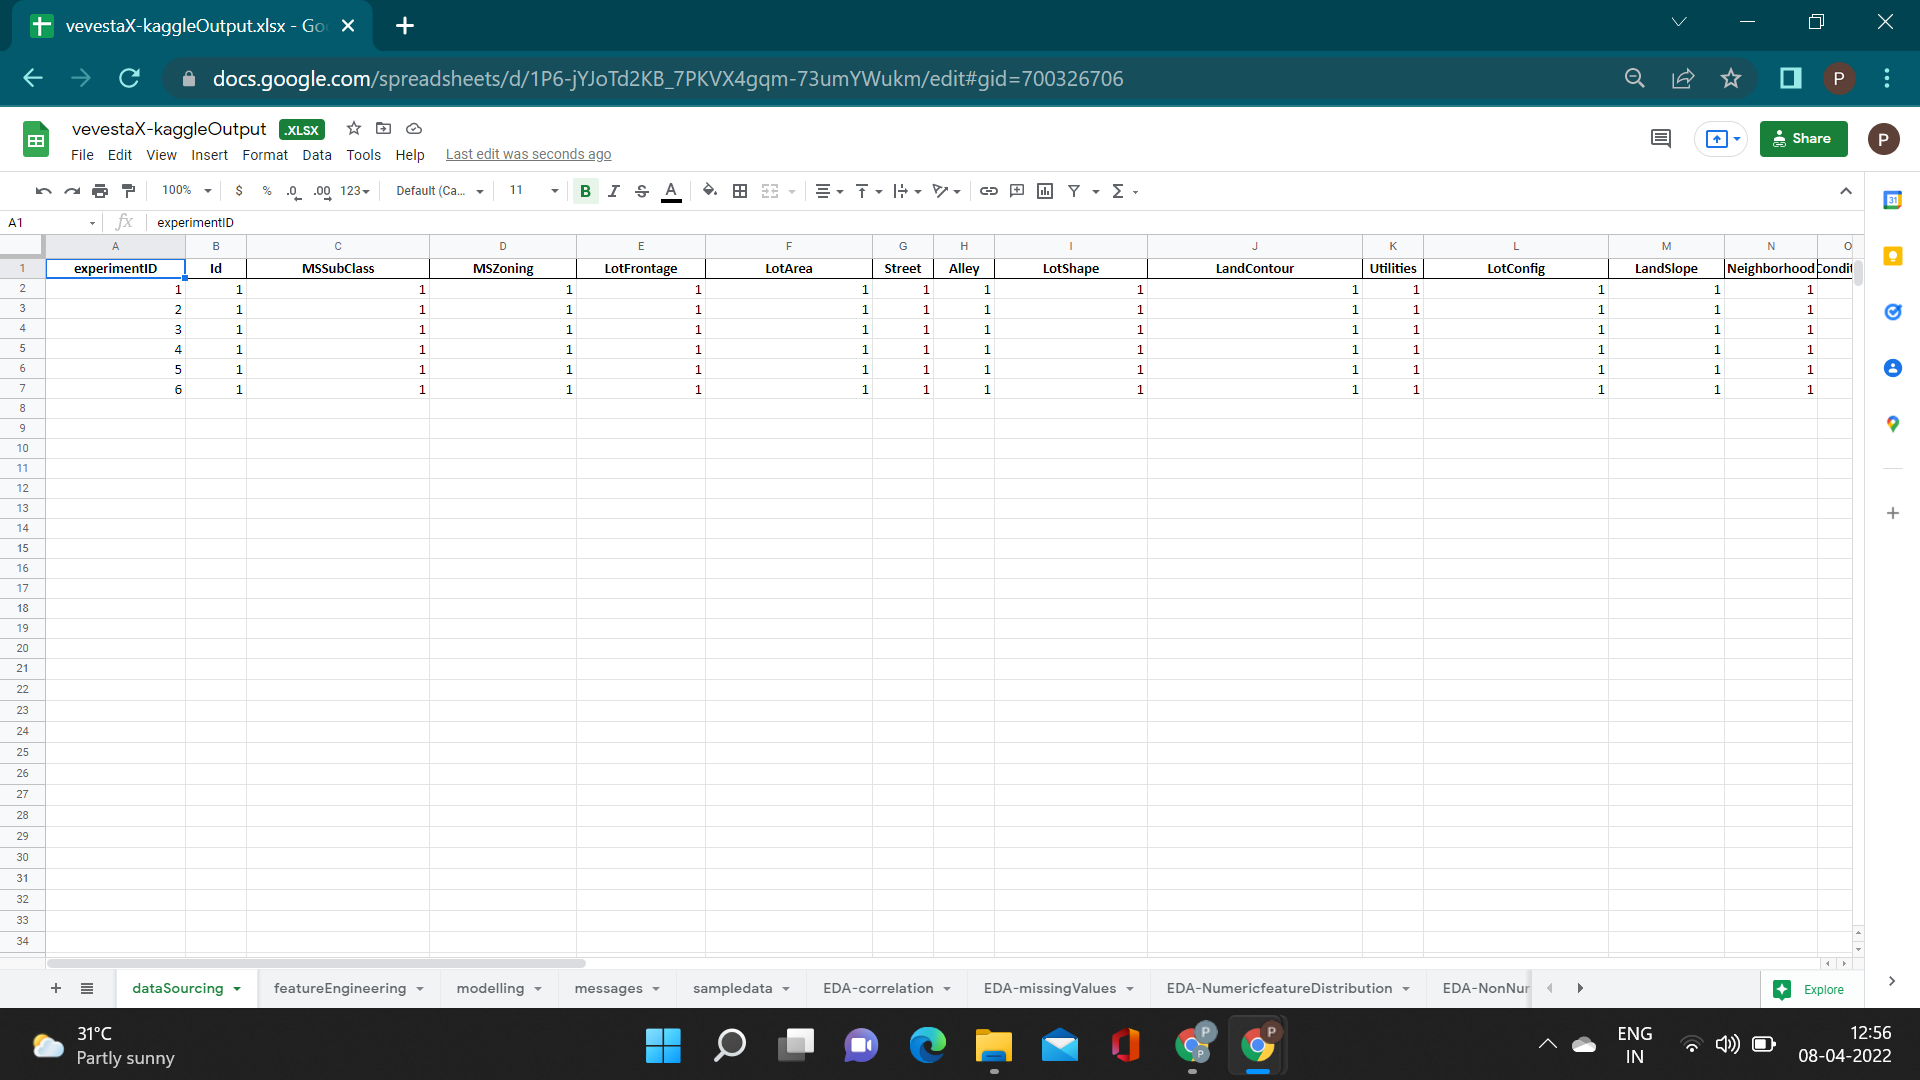

<a id="12"></a>
## References:
1. https://www.kaggle.com/code/mohamedaymanshaheen/regression-model